# Resampling and the Bootstrap

*Adapted from Data 8.2X Lab 5 from Summer 2018.*

We will attempt to estimate the number `N`, a *population parameter*, that represents the number of elements in a population. We get to observe a uniform random sample with replacement of the elements, and for each one we can observe its serial number (from 1 to `N`). All elements are labeled with consecutive serial numbers from 1 to `N`, so `N` is the total number of elements. 

Given *just* a random sample of elements, we'll estimate `N`, and then we'll use simulation to find a confidence interval around our estimate, all without ever looking at the whole population.  This is an example of *statistical inference*.

As usual, **run the cell below** to prepare the lab and the automatic tests.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

!pip install git+https://github.com/data-8/Gofer-Grader.git
from gofer.ok import check

  Cloning https://github.com/data-8/Gofer-Grader.git to /private/var/folders/b0/rspxfhtn265c8kb3tfy8s5kc0000gp/T/pip-req-build-608s1a52
  Running setup.py bdist_wheel for gofer-grader ... done
  Stored in directory: /private/var/folders/b0/rspxfhtn265c8kb3tfy8s5kc0000gp/T/pip-ephem-wheel-cache-jy6upo_8/wheels/a6/a1/38/961db2f70ca17006998d4a298122bc7aab6b82bb00b8c2837a
Successfully built gofer-grader


## 1. Preliminaries
The setup: We want to know the number of elements in the population.  That number is `N`.  Each element is numbered from 1 to `N`.

We only see a small number of elements (assumed to be a uniform random sample with replacement from among all the elements), so we have to use estimation.

#### Question 1.1
Is `N` a population parameter or a statistic?  If we compute a number using our random sample that's an estimate of `N`, is that a population parameter or a statistic?

*Write your answer here, replacing this text.*

Check your answer by posting on the discussion forum.

To make the situation realistic, we're going to hide the true number of elements from you.  You'll have access only to this random sample:

In [2]:
observations = Table.read_table("serial_numbers.csv")
num_observations = observations.num_rows
observations

serial number
47
42
57
79
26
23
36
64
83
135


#### Question 1.2
Define a function named `plot_serial_numbers` to make a histogram of any table of serial numbers.  It should take one argument, a table like `observations` with one column called `"serial number"`.  It should plot a histogram of the values in the column **using bins of width 1** ranging from **1 to 200** but return nothing.  Then, call that function to make a histogram of `observations`.

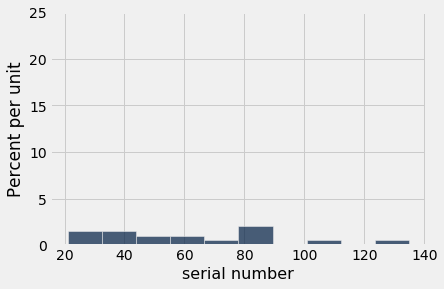

In [3]:
def plot_serial_numbers(numbers):
    numbers.hist(0)
    
    # Assuming the lines above produce a histogram, this next
    # line may make your histograms look nicer.  Feel free to
    # delete it if you want.
    plt.ylim(0, .25)

plot_serial_numbers(observations)

#### Question 1.3
By looking at the histogram, what can we say about `N` immediately? (Hint: What is the relationship between `N` and the largest serial number in `observations`?) What does each little bar in the histogram represent? Why are all the bars about the same height?

It's at least 130 or so. Each bar is the density of values in a given range. All bars are the same height because `observations` is a sample from a uniform distribution.

#### Question 1.4
One way to estimate `N` is to take twice the mean of the serial numbers we observe. Write a function that computes that statistic.  It should take as its argument an array of serial numbers and return twice their mean.  Call it `mean_based_estimator`.  

After that, use it to compute an estimate of `N` called `mean_based_estimate`.

In [4]:
def mean_based_estimator(nums):
    return 2 * np.mean(nums)

mean_based_estimate = mean_based_estimator(observations.column(0))
mean_based_estimate

122.47058823529412

In [5]:
check('tests/q1_4.py')

#### Question 1.5
We can also estimate `N` using the biggest serial number in the sample.  Compute it, giving it the name `max_estimate`.

In [6]:
max_estimate = max(observations.column(0))
max_estimate

135

In [7]:
check('tests/q1_5.py')

## 2. Resampling
Next, we want to get a sense of the accuracy of our estimates. To do this, we'll use resampling. 

#### Question 2.1
Write a function called `simulate_resample`.  It should generate a resample from the observed serial numbers in `observations` and return that resample.  (The resample should be a table like `observations`.)  It should take no arguments.

In [8]:
def simulate_resample():
    return observations.sample()

Let's resample once.

In [9]:
# This line is a little magic to make sure that everyone sees the same result.
np.random.seed(123)

one_resample = simulate_resample()
one_resample

serial number
108
57
57
36
41
42
47
50
135
47


In [10]:
check('tests/q2_1.py')

Later, we'll use many resamples at once to see what estimates typically look like.  We don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's examine some individual resamples before we start using them.

#### Question 2.2
In preparation for answering the next question, generate a histogram of your resample using the plotting function you defined earlier in this lab, **and** generate a separate histogram of the original observations.

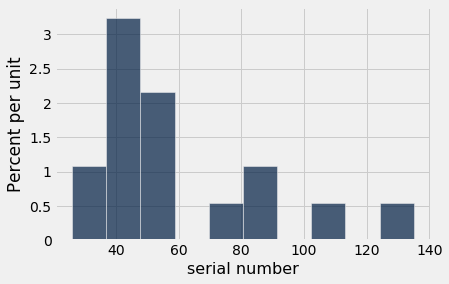

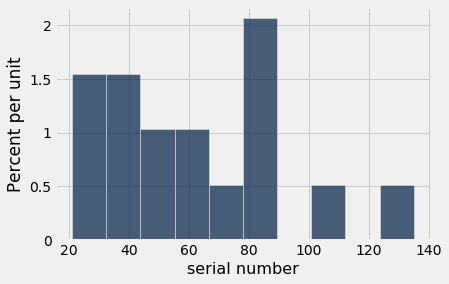

In [11]:
one_resample.hist(0)
observations.hist(0)

#### Question 2.3
Which of the following are true:
1. In the plot of the resample, there are no bars at locations that weren't there in the plot of the original observations.
2. In the plot of the original observations, there are no bars at locations that weren't there in the plot of the resample.
3. The resample has exactly one copy of each serial number.
4. The sample has exactly one copy of each serial number.

Assign true_statements to a list of the correct statements.

In [14]:
true_statements = [1, 4]

In [15]:
check('tests/q2_3.py')

#### Question 2.4
Create two more resamples using the function `simulate_resample` from above. For each resampled data, plot it and compute its max- and mean-based estimates.

In [22]:
resample_0 = simulate_resample()
mean_based_estimate_0 = mean_based_estimator(resample_0.column(0))
max_based_estimate_0 = max(resample_0.column(0))
print("Mean-based estimate for resample 0:", mean_based_estimate_0)
print("Max-based estimate for resample 0:", max_based_estimate_0)

resample_1 = simulate_resample()
mean_based_estimate_1 = mean_based_estimator(resample_1.column(0))
max_based_estimate_1 = max(resample_1.column(0))
print("Mean-based estimate for resample 1:", mean_based_estimate_1)
print("Max-based estimate for resample 1:", max_based_estimate_1)

Mean-based estimate for resample 0: 126.23529411764706
Max-based estimate for resample 0: 135
Mean-based estimate for resample 1: 112.0
Max-based estimate for resample 1: 135


#### Question 2.5
Using probability that you've learned, compute the exact chance that a max-based estimate from *one* resample is 135.

135 appears as 1 in 17 observations. The chance that it appears at least once is:

$$1 - \left(\frac{16}{17}\right)^{17} \approx 0.64$$

## 3. Simulating with resampling

#### Question 3.1
Write a function called `simulate_estimates`.  It should take 4 arguments:
1. A table from which the data should be sampled.  The table will have 1 column named `"serial number"`.
2. The size of each sample to draw from that table, an integer.  
3. A function that computes a statistic of a sample.  This argument is a *function* that takes an array of serial numbers as its argument and returns a number.
4. The number of times to sample.

It should simulate many samples with replacement from the given table.  (The number of samples is the 4th argument.)  For each of those samples, it should compute the statistic on that sample. Then it should return an array containing each of those statistics.  The code below provides an example use of your function and describes how you can verify that you've written it correctly.

**Hint**: Your implementation should contain the following line, which extracts the "serial number" column from some table ``t`` and calls the `statistic` function on it, storing the result in the name `s`.

``s = statistic(t.column("serial number"))``

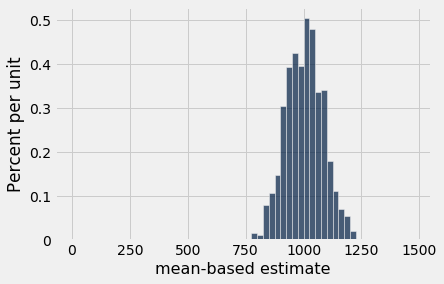

In [24]:
def simulate_estimates(original_table, sample_size, statistic, num_replications):
    # Our implementation of this function took 5 short lines of code.
    results = []
    for _ in range(num_replications):
        t = original_table.sample(sample_size)
        s = statistic(t.column("serial number"))
        results.append(s)
    return np.array(results)
    

# This should generate an empirical histogram of twice-mean estimates
# of N from samples of size 50 if N is 1000.  This should be a bell-shaped
# curve centered at 1000 with most of its mass in [800, 1200].  To verify your
# answer, make sure that's what you see!
example_estimates = simulate_estimates(
    Table().with_column("serial number", np.arange(1, 1000+1)),
    50,
    mean_based_estimator,
    1000)
Table().with_column("mean-based estimate", example_estimates).hist(bins=np.arange(0, 1500, 25))

Now we can go back to the sample we actually observed (the table `observations`) and estimate how much our mean-based estimate of `N` would have varied from sample to sample.

#### Question 3.2
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *mean-based estimates* of `N`.  Use 5,000 replications.  
We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

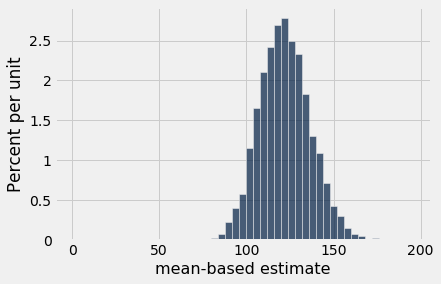

In [25]:
bootstrap_estimates = simulate_estimates(observations, 17, mean_based_estimator, 5000)
Table().with_column("mean-based estimate", bootstrap_estimates).hist(bins=np.arange(0, 200, 4)) 

#### Question 3.3
Compute an interval that covers the middle 95% of the bootstrap estimates.  Verify that your interval looks like it covers 95% of the area in the histogram above.

In [28]:
left_end = percentile(5, bootstrap_estimates)
right_end = percentile(95, bootstrap_estimates)
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(left_end, right_end))

Middle 95% of bootstrap estimates: [99.529412, 146.823529]


#### Question 3.4
What can you conclude from this analysis?

This 95% confidence interval may or may not contain N. It was chosen such that for 95% of samples, the interval will contain the parameter. However, since we have only one sample, there's no way to tell whether this particular interval contains the parameter or not.

The original `N` used to generate `observations` was 150.

*In the remainder of this lab (omitted), students drew new samples from the population and computed confidence intervals for each one to observe how often the procedure gives an interval containing the parameter.*